In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import scipy.io as sio
import sys
model_dir = '/Users/akuan/Dropbox (HMS)/htem_team/projects/PPC_project/modelling/opponent-inhibition-models'
sys.path.insert(0, '../modelling/opponent-inhibition-models')
sys.path.insert(0, '../modelling/opponent-inhibition-models/modules')
sys.path.insert(0, '../modelling/opponent-inhibition-models/data')
from decoding import *
from modules import data_analysis_tools as dat
from plottingtools import  *
from numpy.linalg import eigvals
from numpy.random import choice
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
from scipy.stats import gaussian_kde
from RecurrentNets import *
# import mpl_scatter_density
import scipy.stats as stats
plt.rcParams.update({
    "text.usetex": False})
cwd = os.getcwd()
figsDir = os.sep.join([cwd,'fig_panels/'])
model_dir =  os.sep.join([cwd, '../modelling','opponent-inhibition-models'])
workingDir = os.sep.join([os.path.dirname(cwd), 'analysis_dataframes/'])

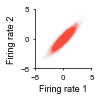

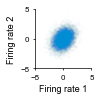

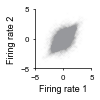

In [2]:
# ED 12a,b,c
n_samples = 10000

rho1 =  0.9
cov = array([[1, rho1],[rho1, 1]])
r1 = random.multivariate_normal(array([0, 0]), cov, n_samples)

rho2 =  0.3
cov = array([[1, rho2],[rho2, 1]])
r2 = random.multivariate_normal(array([0, 0]), cov, n_samples)

r12 = concatenate((r1,r2), axis=0)

figsize=(1.5,1.5)
figure(figsize=figsize)
scatter(r1[:,0], r1[:,1], s=2, c='#f54d3d', alpha=0.01)
xticks([-5,0,5])
yticks([-5,0,5])
xlabel('Firing rate 1')
ylabel('Firing rate 2')
# title(r'$\rho=0.9$', fontsize=9)
tight_layout()

figure(figsize=figsize)
scatter(r2[:,0], r2[:,1], s=2, c='#008dd4', alpha=0.01)
xticks([-5,0,5])
yticks([-5,0,5])
xlabel('Firing rate 1')
ylabel('Firing rate 2')
# title(r'$\rho=0.3$', fontsize=9)
tight_layout()

figure(figsize=figsize)
scatter(r12[:,0], r12[:,1], s=2, c='#97989c', alpha=0.01)
xticks([-5,0,5])
yticks([-5,0,5])
xlabel('Firing rate 1')
ylabel('Firing rate 2')
# title(r'$\rho=0.6$', fontsize=9)
tight_layout()

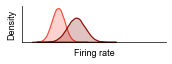

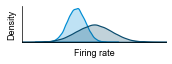

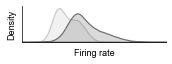

In [3]:
#ED 12d,e,f
import seaborn as sns

n_samples = 50000
sigma1=0.2
sigma2=0.5

r1_cue1 = random.normal(4, 0.7, n_samples)
r1_cue2 = random.normal(6, 1, n_samples)
r2_cue1 = random.normal(6, 1, n_samples)
r2_cue2 = random.normal(8, 2, n_samples)

# r1_cue1 = random.poisson(20, n_samples)
# r1_cue2 = random.poisson(35, n_samples)
# r2_cue1 = random.poisson(30, n_samples)
# r2_cue2 = random.poisson(45, n_samples)

r12_cue1 = concatenate((r1_cue1, r2_cue1))
r12_cue2 = concatenate((r1_cue2, r2_cue2))

figsize=(2.5,1.)
figure(figsize=figsize)
sns.kdeplot(r1_cue1, color='#f54d3d', shade=True, lw=1.2)
sns.kdeplot(r1_cue2, color='#851005', shade=True, lw=1.2)
xticks([])
yticks([])
xlim(0,16)
xlabel('Firing rate')
ylabel('Density')
tight_layout()

figsize=(2.5,1.)
figure(figsize=figsize)
sns.kdeplot(r2_cue1, color='#008dd4', shade=True, lw=1.2)
sns.kdeplot(r2_cue2, color='#0a4c6e', shade=True, lw=1.2)
xticks([])
yticks([])
xlim(0,16)
xlabel('Firing rate')
ylabel('Density')
tight_layout()

figsize=(2.5,1.)
figure(figsize=figsize)
sns.kdeplot(r12_cue1, color='#c8c9cc', shade=True, lw=1.2)
sns.kdeplot(r12_cue2, color='#6e6e6e', shade=True, lw=1.2)
xticks([])
yticks([])
xlim(0,16)
xlabel('Firing rate')
ylabel('Density')
tight_layout()

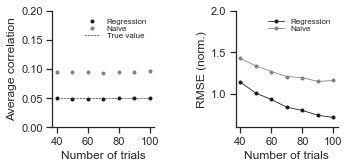

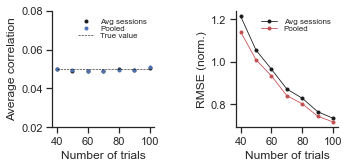

In [4]:
# ED 12g-h
# NOTE: Colors need to be correct and matched to fig
data = load(model_dir+'/data/appeal/randIn/n131/correlation_methods_simu_giulio_nohetero.npy', allow_pickle=True)
rho_reg_single, rho_reg_all, rho_all_noreg, RMSE_reg_single, RMSE_reg_all, RMSE_noreg_all, N_samples, RHO = data

import seaborn as sns
sns.set(rc={'figure.figsize':(4,2)}, font_scale=1, style='ticks')


fig = figure(figsize=((5,2.5)))
ax = fig.add_subplot(1,2,1)
plot(array(N_samples), nanmean(rho_reg_all,0), '.', lw=0.3, c='k', label='Regression')
plot(array(N_samples), nanmean(rho_all_noreg,0), '.', c='grey', lw=0.3, label='Naive')
plot(array(N_samples), RHO*ones(len(N_samples)), '--', c='k', lw=0.6, label='True value')
xlabel('Number of trials')
ylabel('Average correlation')
ylim(0.,0.2)
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
sns.despine()

ax = fig.add_subplot(1,2,2)
plot(array(N_samples), RMSE_reg_all, '.-', lw=0.8, c='k', label='Regression')
plot(array(N_samples), RMSE_noreg_all, '.-', lw=0.8, c='grey', label='Naive')
xlabel('Number of trials')
ylabel('RMSE (norm.)')
ylim(0.6,2)
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
tight_layout()
sns.despine()

plt.subplots_adjust(wspace=0.8, hspace = 0.4)
# plt.savefig(figsDir+'suppFig8a.pdf',bbox_inches='tight', dpi=300)

sns.set(rc={'figure.figsize':(4,2)}, font_scale=1, style='ticks')
fig = figure(figsize=((5,2.5)))
ax = fig.add_subplot(1,2,1)
plot(array(N_samples), nanmean(rho_reg_single,0), '.', lw=0.8, c='k', label='Avg sessions')
plot(array(N_samples), nanmean(rho_reg_all,0), '.', lw=0.8, label='Pooled')
plot(array(N_samples), RHO*ones(len(N_samples)), '--', c='k', lw=0.6, label='True value')
xlabel('Number of trials')
ylabel('Average correlation')
ylim(0.02,0.08)
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
sns.despine()

ax = fig.add_subplot(1,2,2)
plot(array(N_samples), RMSE_reg_single, '.-', lw=0.8, c='k', label='Avg sessions')
plot(array(N_samples), RMSE_reg_all, '.-', lw=0.8, c='r',label='Pooled')
xlabel('Number of trials')
ylabel('RMSE (norm.)')
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
tight_layout()
sns.despine()
plt.subplots_adjust(wspace=0.8, hspace = 0.4)

plt.savefig(figsDir+'suppFig8b.pdf',bbox_inches='tight', dpi=300)

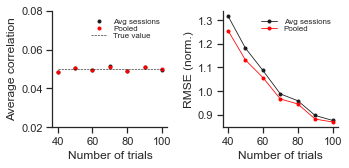

In [6]:
# ED Fig 1i
data = load(model_dir+'/data/appeal/randIn/n131/correlation_methods_simu_giulio_hetero.npy', allow_pickle=True)
rho_reg_single, rho_reg_all, rho_all_noreg, RMSE_reg_single, RMSE_reg_all, RMSE_noreg_all, N_samples, RHO = data

sns.set(rc={'figure.figsize':(4,2)}, font_scale=1, style='ticks')
fig = figure(figsize=((5,2.5)))
ax = fig.add_subplot(1,2,1)
plot(array(N_samples), nanmean(rho_reg_single,0), '.', lw=0.8, c='k', label='Avg sessions')
plot(array(N_samples), nanmean(rho_reg_all,0), '.', lw=0.8, label='Pooled', color = 'red')
plot(array(N_samples), RHO*ones(len(N_samples)), '--', c='k', lw=0.6, label='True value')
xlabel('Number of trials')
ylabel('Average correlation')
ylim(0.02,0.08)
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
sns.despine()

ax = fig.add_subplot(1,2,2)
plot(array(N_samples), RMSE_reg_single, '.-', lw=0.8, c='k', label='Avg sessions')
plot(array(N_samples), RMSE_reg_all, '.-', lw=0.8, label='Pooled',color = 'red')
xlabel('Number of trials')
ylabel('RMSE (norm.)')
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
tight_layout()
sns.despine()

plt.savefig(figsDir+'suppFig8c.pdf',bbox_inches='tight', dpi=300)

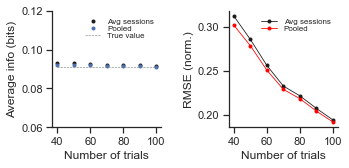

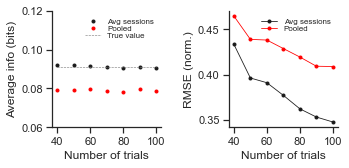

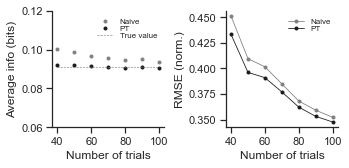

In [9]:
# ED 12j,k,l 
# NOTE colors need fixing
from scipy.io import loadmat
mat_file = loadmat(model_dir+'/data/appeal/randIn/n131/variables_info_stefano.mat')
num_trials = mat_file['num_sim_trials'][0]
mu_I = mat_file['mu_I'][0][0]
Info_pool = mat_file['Info_pool']
Info_pool_homo = mat_file['Info_pool_homo']
Info_sess = mat_file['Info_sess']
Info_sess_homo = mat_file['Info_sess_homo']
Info_sess_naive = mat_file['Info_sess_naive']
RMSE_pooled_homo = mat_file['RMSE_pooled_homo'][0]
RMSE_session_homo = mat_file['RMSE_session_homo'][0]
RMSE_pooled = mat_file['RMSE_pooled'][0]
RMSE_session = mat_file['RMSE_session'][0]
RMSE_session_naive = mat_file['RMSE_session_naive'][0]
##

sns.set(rc={'figure.figsize':(4,2)}, font_scale=1, style='ticks')
fig = figure(figsize=(5,2.5))

ax = fig.add_subplot(1,2,1)
plot(num_trials, nanmean(nanmean(Info_sess_homo,2),1), '.', lw=0.8, c='k', label='Avg sessions')
plot(num_trials, nanmean(Info_pool_homo,1), '.', lw=0.8, label='Pooled')
plot(num_trials, mu_I*ones(len(num_trials)), '--', c='grey', lw=0.6, label='True value')
xlabel('Number of trials')
ylabel('Average info (bits)')
xticks([40,60,80,100])
ylim(0.06,0.12)
legend(frameon=0, labelspacing=0.05, fontsize = 8)
sns.despine()

ax = fig.add_subplot(1,2,2)
plot(num_trials, RMSE_session_homo, '.-', lw=0.8, c='k', label='Avg sessions')
plot(num_trials, RMSE_pooled_homo, '.-', lw=0.8, label='Pooled', color='Red')
xlabel('Number of trials')
ylabel('RMSE (norm.)')
legend(frameon=0, labelspacing=0.05, fontsize = 8)
xticks([40,60,80,100])
tight_layout()
sns.despine()
#plt.savefig(figsDir+'suppFig8e.pdf',bbox_inches='tight', dpi=300)
##

sns.set(rc={'figure.figsize':(6,3)}, font_scale=1, style='ticks')
fig = figure(figsize=((5,2.5)))

ax = fig.add_subplot(1,2,1)
plot(num_trials, nanmean(nanmean(Info_sess,2),1), '.', lw=0.8, c='k', label='Avg sessions')
plot(num_trials, nanmean(Info_pool,1), '.', lw=0.8, label='Pooled', color='Red')
plot(num_trials, mu_I*ones(len(num_trials)), '--', c='grey', lw=0.6, label='True value')
xlabel('Number of trials')
ylabel('Average info (bits)')
ylim(0.06,0.12)
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
sns.despine()
ax = fig.add_subplot(1,2,2)
plot(num_trials, RMSE_session, '.-', lw=0.8, c='k', label='Avg sessions')
plot(num_trials, RMSE_pooled, '.-', lw=0.8, label='Pooled', color='Red')
xlabel('Number of trials')
ylabel('RMSE (norm.)')
legend(frameon=0, labelspacing=0.05, fontsize = 8)
xticks([40,60,80,100])
tight_layout()
sns.despine()
#plt.savefig(figsDir+'suppFig8f.pdf',bbox_inches='tight', dpi=300)
##

sns.set(rc={'figure.figsize':(4,2)}, font_scale=1, style='ticks')
fig = figure(figsize=((5,2.5)))

ax = fig.add_subplot(1,2,1)
plot(num_trials, nanmean(nanmean(Info_sess_naive,2),1), '.', lw=0.8, c='grey', label='Naive')
plot(num_trials, nanmean(nanmean(Info_sess,2),1), '.', c='k', lw=0.8, label='PT')
plot(num_trials, mu_I*ones(len(num_trials)), '--', c='grey', lw=0.6, label='True value')
xlabel('Number of trials')
ylabel('Average info (bits)')
ylim(0.06,0.12)
xticks([40,60,80,100])
legend(frameon=0, labelspacing=0.05, fontsize = 8)
sns.despine()

ax = fig.add_subplot(1,2,2)
plot(num_trials, RMSE_session_naive, '.-', lw=0.8, c='grey', label='Naive')
plot(num_trials, RMSE_session, '.-', c='k', lw=0.8, label='PT')
xlabel('Number of trials')
ylabel('RMSE (norm.)')
legend(frameon=0, labelspacing=0.05, fontsize = 8)
xticks([40,60,80,100])
tight_layout()
sns.despine()
plt.savefig(figsDir+'suppFig8d.pdf',bbox_inches='tight', dpi=300)